<a href="https://colab.research.google.com/github/mhyubr/Find-It-DaBes-Salary-Prediction/blob/main/Find_It_DaBes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/train.csv', sep="|")


In [ ]:
# predict_case.head(2)

In [ ]:
# predict_case.shape

In [ ]:
# predict_case.isna().sum()

In [ ]:
train.head(2)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31746 entries, 0 to 31745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31746 non-null  int64  
 1   job_title             31746 non-null  object 
 2   location              31746 non-null  object 
 3   salary_currency       31742 non-null  object 
 4   career_level          31746 non-null  object 
 5   experience_level      27454 non-null  object 
 6   education_level       31746 non-null  object 
 7   employment_type       30402 non-null  object 
 8   job_function          31746 non-null  object 
 9   job_benefits          25079 non-null  object 
 10  company_process_time  22602 non-null  object 
 11  company_size          26583 non-null  object 
 12  company_industry      30232 non-null  object 
 13  job_description       31745 non-null  object 
 14  salary                6352 non-null   float64
dtypes: float64(1), int6

# Preprocessing

## Salary

In [ ]:
train_non_nan_salary = train.dropna(subset = ['salary'], inplace = False)

In [ ]:
train_non_nan_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6352 entries, 5 to 31744
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6352 non-null   int64  
 1   job_title             6352 non-null   object 
 2   location              6352 non-null   object 
 3   salary_currency       6352 non-null   object 
 4   career_level          6352 non-null   object 
 5   experience_level      5819 non-null   object 
 6   education_level       6352 non-null   object 
 7   employment_type       6352 non-null   object 
 8   job_function          6352 non-null   object 
 9   job_benefits          4819 non-null   object 
 10  company_process_time  4204 non-null   object 
 11  company_size          5408 non-null   object 
 12  company_industry      6160 non-null   object 
 13  job_description       6352 non-null   object 
 14  salary                6352 non-null   float64
dtypes: float64(1), int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


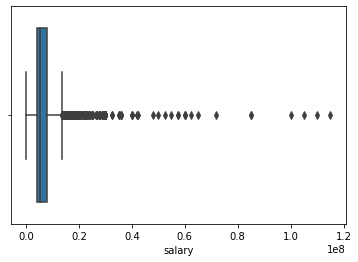

In [ ]:
sns.boxplot(train_non_nan_salary['salary'])

## job_title

In [ ]:
train_non_nan_salary["job_title"] = train_non_nan_salary["job_title"].apply(lambda item: np.NaN if item is np.NaN else str(item).lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(train_non_nan_salary['job_title'].unique())

4086

In [ ]:
train_non_nan_salary['job_title'].unique()[0:50]

array(['kepala pabrik', 'tax supervisor', 'accounting staff',
       'senior staff purchasing',
       'marketing communication & channel manager', 'mechanic', 'ppic',
       'c# advanced/senior developer',
       'manager tiktok shop and tiktok live',
       'it software developer staff', 'asisten penerjemah',
       'backend developer', 'teknik sipil',
       'bancassurance specialist - surabaya', 'cook helper',
       'warnen/cleaning service', 'cook',
       'regional sales manager (jabar, jabodetabek)',
       'distribution center manager', 'api programmer',
       'technical designer dan estimator', 'back end engineer',
       'taxation staff', 'education content creator',
       'finance & accounting manager - port management - subang (a-73378)',
       'senior infosec engineer', 'account manager', 'drafter',
       'senior software engineer - android mobile', 'waitress/waiter',
       'helper',
       'digital and social media executive (travel & lifestyle pr)',
       'sales r

In [ ]:
# def hapus_min(data):
#     data_bersih = ''
#     for i in data:
#         if i == '-':
#             break
#         else:
#             data_bersih += i
#     return data_bersih

In [ ]:
# def hapus_min(data):
#   split_string = data.split("-", 1)
#   substring = split_string[0]
#   return substring.rstrip()

# hapus_min("bancassurance specialist - surabaya', 'cook helper'")

In [ ]:
def removeTextInsideBrackets(data):
  data = re.sub("\(.*?\)", "", data)
  return data

In [ ]:
train_non_nan_salary["job_title"] = train_non_nan_salary["job_title"].apply(removeTextInsideBrackets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(train_non_nan_salary['job_title'].unique())

3940

In [ ]:
train_non_nan_salary.head(2)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,kepala pabrik,Balikpapan,IDR,Supervisor/Koordinator,NaN,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,tax supervisor,Banten,IDR,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0


## salary_currency

In [ ]:
train_non_nan_salary['salary_currency'].unique()

array(['IDR', 'USD'], dtype=object)

In [ ]:
train_non_nan_salary[train_non_nan_salary['salary_currency'] == 'USD']

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
162,163,digital and social media executive,Jakarta Pusat,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing","Waktu regular, Senin - Jumat",29 days,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,DIGITAL / SOCIAL MEDIA EXECUTIVEWe are recruit...,665.0
30895,30896,registered nurse aesthetic and wellness,Bali,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Layanan Kesehatan,Praktisi/Asisten Medis",Tip;Bisnis (contoh: Kemeja);Mon - Sat,NaN,1- 50 pekerja,Perawatan/Kecantikan/Fitnes,Registered Nurse Aesthetic and WellnessMaldive...,1005.0


In [ ]:
train_new = train_non_nan_salary.drop(train_non_nan_salary[(train_non_nan_salary['salary'] < 2000) & (train_non_nan_salary['salary_currency'] == 'IDR')].index)

In [ ]:
train_new[train_new['salary'] < 2000]

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
162,163,digital and social media executive,Jakarta Pusat,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing","Waktu regular, Senin - Jumat",29 days,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,DIGITAL / SOCIAL MEDIA EXECUTIVEWe are recruit...,665.0
30895,30896,registered nurse aesthetic and wellness,Bali,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Layanan Kesehatan,Praktisi/Asisten Medis",Tip;Bisnis (contoh: Kemeja);Mon - Sat,NaN,1- 50 pekerja,Perawatan/Kecantikan/Fitnes,Registered Nurse Aesthetic and WellnessMaldive...,1005.0


In [ ]:
train_new.loc[train_new["salary_currency"] == 'USD', "salary"] = train_new.loc[train_new["salary"] < 2000]*14000

In [ ]:
train_new.drop('salary_currency', axis=1, inplace=True)

In [ ]:
train_new.head(3)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,kepala pabrik,Balikpapan,Supervisor/Koordinator,NaN,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,tax supervisor,Banten,Supervisor/Koordinator,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,accounting staff,Jakarta Pusat,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0


## experience_level

In [ ]:
train_new['experience_level'].unique()

array([nan, '3 tahun', '1 tahun', '2 tahun', '5 tahun', '4 tahun',
       '10 tahun', '6 tahun', '8 tahun', '7 tahun', '15 tahun',
       '12 tahun', '11 tahun', '17 tahun', '20 tahun'], dtype=object)

In [ ]:
def experience_level(el):
    if el is not np.NaN:
      variabel_baru = el.replace(" tahun", "")  
      return int(variabel_baru)

In [ ]:
train_new['experience_level'] = train_new['experience_level'].apply(experience_level)

In [ ]:
train_new.head(2)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,kepala pabrik,Balikpapan,Supervisor/Koordinator,NaN,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,tax supervisor,Banten,Supervisor/Koordinator,3.0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0


In [ ]:
train_new.isna().sum()

id                         0
job_title                  0
location                   0
career_level               0
experience_level         533
education_level            0
employment_type            0
job_function               0
job_benefits            1533
company_process_time    2145
company_size             944
company_industry         192
job_description            0
salary                     0
dtype: int64

In [ ]:
train_new['experience_level'].fillna(round(train_new['experience_level'].mean(), 2), inplace=True)

In [ ]:
train_new.isna().sum()

id                         0
job_title                  0
location                   0
career_level               0
experience_level           0
education_level            0
employment_type            0
job_function               0
job_benefits            1533
company_process_time    2145
company_size             944
company_industry         192
job_description            0
salary                     0
dtype: int64

In [ ]:
train_new['experience_level']

5        2.38
9        3.00
18       1.00
22       2.00
26       2.00
         ... 
31719    1.00
31720    2.38
31729    5.00
31732    1.00
31744    2.00
Name: experience_level, Length: 6349, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = train_new[['experience_level']]

Scale = MinMaxScaler(feature_range=(0,1))
el_data = Scale.fit_transform(data)
el_data

array([[0.07263158],
       [0.10526316],
       [0.        ],
       ...,
       [0.21052632],
       [0.        ],
       [0.05263158]])

In [ ]:
el_data

array([[0.07263158],
       [0.10526316],
       [0.        ],
       ...,
       [0.21052632],
       [0.        ],
       [0.05263158]])

In [ ]:
train_new['experience_level_scaled'] = el_data

In [ ]:
train_new.head(3)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled
5,6,kepala pabrik,Balikpapan,Supervisor/Koordinator,2.38,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,0.072632
9,10,tax supervisor,Banten,Supervisor/Koordinator,3.00,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,0.105263
18,19,accounting staff,Jakarta Pusat,Pegawai (non-manajemen & non-supervisor),1.00,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,0.000000


In [ ]:
train_new.head()

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled
5,6,kepala pabrik,Balikpapan,Supervisor/Koordinator,2.38,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,0.072632
9,10,tax supervisor,Banten,Supervisor/Koordinator,3.00,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,0.105263
18,19,accounting staff,Jakarta Pusat,Pegawai (non-manajemen & non-supervisor),1.00,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,0.000000
22,23,senior staff purchasing,Surabaya,Pegawai (non-manajemen & non-supervisor),2.00,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,0.052632
26,27,marketing communication & channel manager,Jakarta Pusat,Manajer/Asisten Manajer,2.00,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,0.052632


## company_process_time

In [ ]:
train_new['company_process_time'].unique()

array(['18 days', '22 days', nan, '29 days', '21 days', '5 days',
       '4 days', '7 days', '26 days', '23 days', '20 days', '28 days',
       '19 days', '1 day', '27 days', '30 days', '12 days', '24 days',
       '6 days', '15 days', '25 days', '17 days', '9 days', '16 days',
       '14 days', '11 days', '3 days', '2 days', '13 days', '10 days',
       '8 days'], dtype=object)

In [ ]:
def company_process_time(cpt):
    if cpt is not np.NaN and cpt == '1 day':
        variabel_baru = cpt.replace(" day", "")  
        return int(variabel_baru)
    elif cpt is not np.NaN:
        variabel_baru = cpt.replace(" days", "")
        return int(variabel_baru)  

In [ ]:
# def company_process_time(cpt):
#     day_baru = ''
#     if cpt not in ' days':
#         day_baru += cpt
#     return int(day_baru)

In [ ]:
train_new['company_process_time'] = train_new['company_process_time'].apply(company_process_time)

In [ ]:
train_new.head()

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled
5,6,kepala pabrik,Balikpapan,Supervisor/Koordinator,2.38,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18.0,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,0.072632
9,10,tax supervisor,Banten,Supervisor/Koordinator,3.00,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22.0,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,0.105263
18,19,accounting staff,Jakarta Pusat,Pegawai (non-manajemen & non-supervisor),1.00,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,0.000000
22,23,senior staff purchasing,Surabaya,Pegawai (non-manajemen & non-supervisor),2.00,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29.0,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,0.052632
26,27,marketing communication & channel manager,Jakarta Pusat,Manajer/Asisten Manajer,2.00,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29.0,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,0.052632


In [ ]:
train_new['company_process_time'].unique()

array([18., 22., nan, 29., 21.,  5.,  4.,  7., 26., 23., 20., 28., 19.,
        1., 27., 30., 12., 24.,  6., 15., 25., 17.,  9., 16., 14., 11.,
        3.,  2., 13., 10.,  8.])

In [ ]:
train_new['company_process_time'].isna().sum()

2145

In [ ]:
train_new['company_industry'].isna().sum()

192

In [ ]:
train_new['company_process_time'].mean()

21.083729781160798

In [ ]:
train_new['job_function'].isna().sum()

0

In [ ]:
job_function = train_new['job_function'].unique()

job_function

array(['Manufaktur,Manufaktur', 'Akuntansi / Keuangan,Audit & Pajak',
       'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan',
       'Manufaktur,Pembelian/Manajemen Material',
       'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis',
       'Teknik,Mekanikal',
       'Komputer/Teknologi Informasi,IT-Perangkat Lunak',
       'Penjualan / Pemasaran,E-commerce',
       'Seni/Media/Komunikasi,Hubungan Masyarakat',
       'Bangunan/Konstruksi,Teknik Sipil/Konstruksi Bangunan',
       'Penjualan / Pemasaran,Penjualan - Jasa Keuangan',
       'Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran',
       'Lainnya,Pekerjaan Umum', 'Pelayanan,Logistik/Rantai Pasokan',
       'Penjualan / Pemasaran,Digital Marketing',
       'Bangunan/Konstruksi,Arsitek/Desain Interior',
       'Manufaktur,Pemeliharaan', 'Penjualan / Pemasaran,Penjualan Ritel',
       'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR',
       'Akuntansi / Keuangan,Keuangan / Investasi Perusahaan ',
       'Komputer/Te

In [ ]:
jobfunction_mean = dict()
for i in range(len(job_function)):
    jobfunction_mean[job_function[i]] = round(train_new[train_new['job_function'] == job_function[i]]['company_process_time'].mean())

jobfunction_mean

{'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan': 21,
 'Akuntansi / Keuangan,Audit & Pajak': 20,
 'Akuntansi / Keuangan,Keuangan / Investasi Perusahaan ': 24,
 'Akuntansi / Keuangan,Perbankan / Jasa Finansial ': 20,
 'Bangunan/Konstruksi,Arsitek/Desain Interior': 24,
 'Bangunan/Konstruksi,Properti/Real Estate': 22,
 'Bangunan/Konstruksi,Survei Kuantitas': 16,
 'Bangunan/Konstruksi,Teknik Sipil/Konstruksi Bangunan': 23,
 'Hotel/Restoran,Hotel/Pariwisata': 18,
 'Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran': 22,
 'Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database': 22,
 'Komputer/Teknologi Informasi,IT-Perangkat Keras': 21,
 'Komputer/Teknologi Informasi,IT-Perangkat Lunak': 17,
 'Lainnya,Jurnalis/Editor': 16,
 'Lainnya,Lainnya/Kategori tidak tersedia': 21,
 'Lainnya,Pekerjaan Umum': 24,
 'Lainnya,Penerbitan': 18,
 'Layanan Kesehatan,Diagnosa/Lainnya': 26,
 'Layanan Kesehatan,Farmasi': 24,
 'Layanan Kesehatan,Praktisi/Asisten Medis': 23,
 'Manufaktur,Kontrol Proses':

In [ ]:
train_new['company_process_time'].fillna(round(train_new['company_process_time'].mean(),0), inplace=True)

In [ ]:
coba_coba = train_new.copy()

In [ ]:
# pointer = 0
# for key, value in jobfunction_mean.items():
#     coba_coba[coba_coba['job_function'] == key].fillna(value, inplace=True)
#     # print(key, value)

In [ ]:
# coba_coba[coba_coba['job_function'] == job_function['Teknik,Minyak/Gas']]

In [ ]:
# coba_coba[coba_coba['job_function'] == job_function[0]]

In [ ]:
# pointer = 0
# for key, value in jobfunction_mean.items():
#     coba_coba[coba_coba['job_function'] == key]['company_process_time'].fillna(value, inplace=True)
#     # print(key, value)

In [ ]:
# coba_coba[coba_coba['job_function'] == job_function[0]]

In [ ]:
# for key, value in jobfunction_mean.items():
# coba_coba.loc[coba_coba.job_function == 'Manufaktur,Manufaktur', ["company_process_time"]].fillna(jobfunction_mean['Manufaktur,Manufaktur'], inplace=True)
# coba_coba.loc[coba_coba['job_function'] == 'Manufaktur,Manufaktur', 'company_process_time'] = coba_coba.loc[coba_coba['job_function'] == 'Manufaktur,Manufaktur', 'company_process_time'].fillna(jobfunction_mean['Manufaktur,Manufaktur'], inplace=True)

In [ ]:
# coba_coba[coba_coba['job_function'] == job_function[0]]

**^ BELUM SELESAI**

## employment_type

In [ ]:
employment_type = train_new['employment_type'].unique()
employment_type

array(['Penuh Waktu', 'Kontrak', 'Paruh Waktu', 'Magang',
       'Penuh Waktu, Magang', 'Temporer', 'Penuh Waktu, Kontrak',
       'Penuh Waktu, Paruh Waktu'], dtype=object)

In [ ]:
len(train_new[(train_new['employment_type'] == employment_type[4]) | (train_new['employment_type'] == employment_type[6]) | (train_new['employment_type'] == employment_type[7])])

7

In [ ]:
train_new.drop(train_new[(train_new['employment_type'] == employment_type[4]) | (train_new['employment_type'] == employment_type[6]) | (train_new['employment_type'] == employment_type[7])].index, axis=0, inplace = True)

In [ ]:
train_new['employment_type'].unique()

array(['Penuh Waktu', 'Kontrak', 'Paruh Waktu', 'Magang', 'Temporer'],
      dtype=object)

In [ ]:
et_label = train_new['employment_type'].unique()
et_label

array(['Penuh Waktu', 'Kontrak', 'Paruh Waktu', 'Magang', 'Temporer'],
      dtype=object)

In [ ]:
def employment_type(et):
    if et is not np.NaN:
        et = re.sub(" ", "_", et)
    return et

In [ ]:
# train_new["employment_type"] = train_new["employment_type"].apply(lambda item: np.NaN if item is np.NaN else str(item).lower())
# train_new["employment_type"] = train_new["employment_type"].apply(employment_type)

In [ ]:
train_new['employment_type'].unique()

array(['Penuh Waktu', 'Kontrak', 'Paruh Waktu', 'Magang', 'Temporer'],
      dtype=object)

In [ ]:
def employment_type_label(et):
    if et == et_label[0]:
        return 0
    elif et == et_label[1]:
        return 1
    elif et == et_label[2]:
        return 2
    elif et == et_label[3]:
        return 3
    elif et == et_label[4]:
        return 4

In [ ]:
train_new['employment_type'] = train_new['employment_type'].apply(employment_type_label)

In [ ]:
train_new['employment_type'].unique() 

array([0, 1, 2, 3, 4])

In [ ]:
# print(employment_type[0],"\t:",len(train_new[train_new['employment_type'] == 0]))
# print(employment_type[1],"\t:",len(train_new[train_new['employment_type'] == 1]))
# print(employment_type[2],"\t:",len(train_new[train_new['employment_type'] == 2]))
# print(employment_type[3],"\t\t:",len(train_new[train_new['employment_type'] == 3]))

## career_level

In [ ]:
career_level = train_new['career_level'].unique()
career_level

array(['Supervisor/Koordinator',
       'Pegawai (non-manajemen & non-supervisor)',
       'Manajer/Asisten Manajer',
       'Lulusan baru/Pengalaman kerja kurang dari 1 tahun',
       'CEO/GM/Direktur/Manajer Senior'], dtype=object)

In [ ]:
def career_level_label(cl):
    if cl == career_level[0]:
        return 0
    elif cl == career_level[1]:
        return 1
    elif cl == career_level[2]:
        return 2
    elif cl == career_level[3]:
        return 3
    elif cl == career_level[4]:
        return 4

In [ ]:
train_new['career_level'] = train_new['career_level'].apply(career_level_label)

In [ ]:
train_new['career_level'].unique() 

array([0, 1, 2, 3, 4])

In [ ]:
print(career_level[0],"\t\t\t\t\t:",len(train_new[train_new['career_level'] == 0]))
print(career_level[1],"\t\t:",len(train_new[train_new['career_level'] == 1]))
print(career_level[2],"\t\t\t\t:",len(train_new[train_new['career_level'] == 2]))
print(career_level[3],"\t:",len(train_new[train_new['career_level'] == 3]))
print(career_level[4],"\t\t\t\t:",len(train_new[train_new['career_level'] == 4]))

Supervisor/Koordinator 					: 1055
Pegawai (non-manajemen & non-supervisor) 		: 3910
Manajer/Asisten Manajer 				: 803
Lulusan baru/Pengalaman kerja kurang dari 1 tahun 	: 465
CEO/GM/Direktur/Manajer Senior 				: 109


## education_level

In [ ]:
sum = 0
for i in range(len(train_new['education_level'].unique())):
  print(train_new['education_level'].unique()[i],":", len(train_new[train_new['education_level'] == train_new['education_level'].unique()[i]]))
  sum += len(train_new[train_new['education_level'] == train_new['education_level'].unique()[i]])

print("\nTotal Data : ", sum)

Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1) : 1110
SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1) : 782
Tidak terspesifikasi : 1098
Sarjana (S1) : 1800
Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2) : 295
SMA, SMU/SMK/STM : 420
Sertifikat Professional, D3 (Diploma), D4 (Diploma) : 303
Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2) : 275
SMA, SMU/SMK/STM, Sarjana (S1) : 53
SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma) : 141
Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3) : 29
Diploma Pascasarjana, Gelar Professional, Magister (S2) : 11
Sarjana (S1), Doktor (S3) : 1
Doktor (S3) : 2
SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2) : 9
Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister 

In [ ]:
len(train_new['education_level'])

6342



*   Doktor (S3) + Sertifikat Professional
*   Doktor (S3) + Gelar Professional
* Doktor (S3)
*   Magister (S2) + Sertifikat Professional
*   Magister (S2) + Gelar Professional
* Magister (S2)
*   Sarjana (S1) + Sertifikat Professional
*   Sarjana (S1) + Gelar Professional
* Sarjana (S1)
*   D4 (Diploma) + Sertifikat Professional
*   D4 (Diploma) + Gelar Professional
* D4 (Diploma)
* SMU/SMK/STM
* Tidak terspesifikasi



In [ ]:
def education_level_label(el):
    if "Doktor (S3)" in el and "Sertifikat Professional" in el:
        return 0
    elif "Doktor (S3)" in el and "Gelar Professional" in el:
        return 1
    elif "Doktor (S3)" in el:
        return 2
    elif "Magister (S2)" in el and "Sertifikat Professional" in el:
        return 3
    elif "Magister (S2)" in el and "Gelar Professional" in el:
        return 4
    # elif "Magister (S2)" in el:
    #     return 5
    elif "Sarjana (S1)" in el and "Sertifikat Professional" in el:
        return 5
    # elif "Sarjana (S1)" in el and "Gelar Professional" in el:
    #     return 7
    elif "Sarjana (S1)" in el:
        return 6
    elif "D4 (Diploma)" in el and "Sertifikat Professional" in el:
        return 7
    # elif "D4 (Diploma)" in el and "Gelar Professional" in el:
    #     return 10
    # elif "D4 (Diploma)" in el:
    #     return 11
    elif "SMU/SMK/STM" in el:
        return 8
    elif "Tidak terspesifikasi" in el:
        return 9
    else:
        return el
     

In [ ]:
train_new['education_level'] = train_new['education_level'].apply(education_level_label)

In [ ]:
el_label = sorted(train_new['education_level'].unique())
el_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
print(el_label[0],"\t:",len(train_new[train_new['education_level'] == 0]))
print(el_label[1],"\t:",len(train_new[train_new['education_level'] == 1]))
print(el_label[2],"\t:",len(train_new[train_new['education_level'] == 2]))
print(el_label[3],"\t:",len(train_new[train_new['education_level'] == 3]))
print(el_label[4],"\t:",len(train_new[train_new['education_level'] == 4]))
print(el_label[5],"\t:",len(train_new[train_new['education_level'] == 5]))
print(el_label[6],"\t:",len(train_new[train_new['education_level'] == 6]))
print(el_label[7],"\t:",len(train_new[train_new['education_level'] == 7]))
print(el_label[8],"\t:",len(train_new[train_new['education_level'] == 8]))
print(el_label[9],"\t:",len(train_new[train_new['education_level'] == 9]))

0 	: 1
1 	: 32
2 	: 3
3 	: 284
4 	: 315
5 	: 1892
6 	: 1853
7 	: 444
8 	: 420
9 	: 1098


## salary_boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


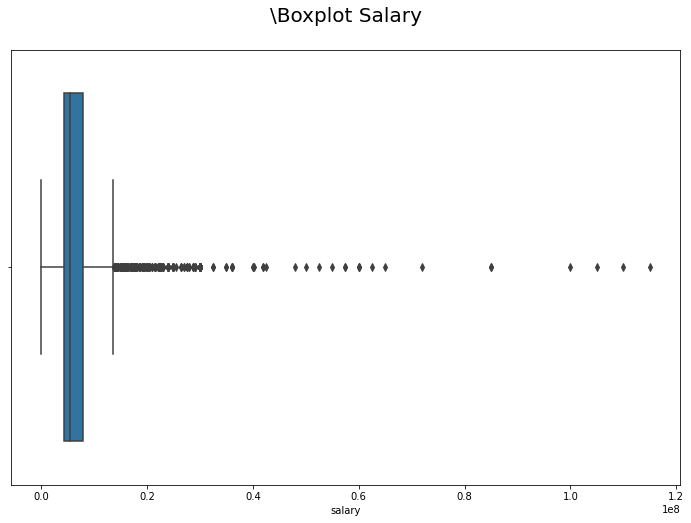

In [ ]:
plt.figure(figsize = (12,8))
plt.title('\Boxplot Salary\n', fontsize = 20)
sns.boxplot(train_new['salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(5300.0, 0.2, 'Outlier')

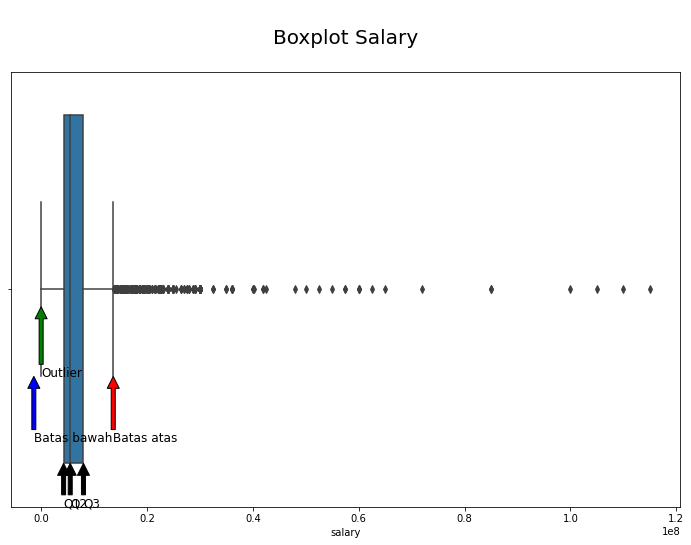

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(train_new['salary'])
plt.title('\nBoxplot Salary\n', fontsize = 20)
plt.annotate('Q1', (np.percentile(train_new['salary'], 25), 0.4), xytext = (np.percentile(train_new['salary'], 25), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
plt.annotate('Q2', (np.percentile(train_new['salary'], 50), 0.4), xytext = (np.percentile(train_new['salary'], 50), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
plt.annotate('Q3', (np.percentile(train_new['salary'], 75), 0.4), xytext = (np.percentile(train_new['salary'], 75), 0.5),arrowprops = dict(facecolor = 'black'), fontsize = 12 )
IQR = np.percentile(train_new['salary'], 75) - np.percentile(train_new['salary'], 25)
batas_bawah = np.percentile(train_new['salary'], 25) - (1.5 * IQR)
batas_atas =  np.percentile(train_new['salary'], 75) + (1.5 * IQR)
plt.annotate('Batas bawah',(batas_bawah+50, 0.2), xytext = (batas_bawah, 0.35)
             ,arrowprops = dict(facecolor = 'blue'), fontsize = 12 )
plt.annotate('Batas atas', (batas_atas-100, 0.2), xytext = (batas_atas, 0.35),arrowprops = dict(facecolor = 'red'), fontsize = 12 )
plt.annotate('Outlier', (min(train_new['salary']), 0.04), xytext = (min(train_new['salary']), 0.2),arrowprops = dict(facecolor = 'green'), fontsize = 12 )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


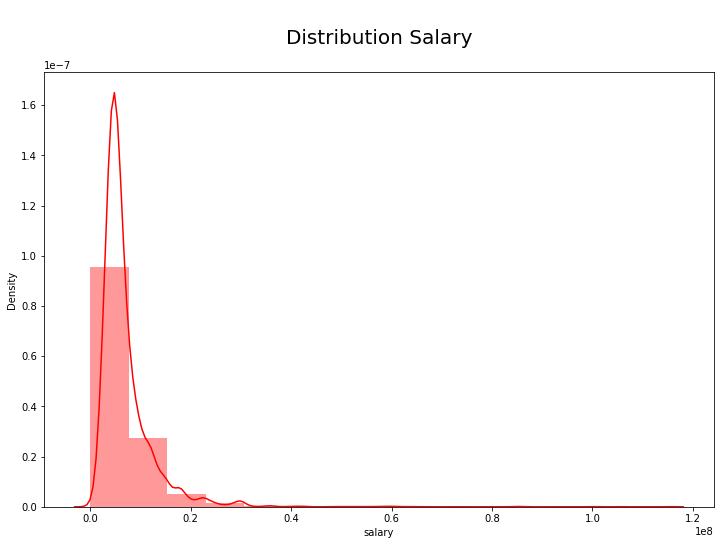

In [ ]:
plt.figure(figsize = (12,8))
plt.title('\nDistribution Salary\n', fontsize = 20)
sns.distplot(train_new['salary'], kde=True, bins=15, color='r')

In [ ]:
# plt.figure(figsize = (8,8))
# sns.distplot(train_new['salary'])
# plt.axvline(x = np.mean(train_new['salary']), ls = '--', c ='red')
# plt.axvline(x = np.mean(train_new['salary']) - np.std(train_new['salary']), ls = '--', c = 'blue')
# plt.axvline(x = np.mean(train_new['salary']) + np.std(train_new['salary']), ls = '--', c = 'blue')
# plt.axvline(x = np.mean(train_new['salary']) - 2*np.std(train_new['salary']), ls = '--', c = 'green')
# plt.axvline(x = np.mean(train_new['salary']) + 2*np.std(train_new['salary']), ls = '--', c = 'green')
# plt.axvline(x = np.mean(train_new['salary']) - 3*np.std(train_new['salary']), ls = '--', c = 'black')
# plt.axvline(x = np.mean(train_new['salary']) + 3*np.std(train_new['salary']), ls = '--', c = 'black')
# plt.annotate('Mean', (np.mean(train_new['salary']), 0.0004), xytext = (np.mean(train_new['salary']), 0.00045),arrowprops = dict(facecolor = 'red'), fontsize = 12 )
# plt.annotate('1 * STD', ((np.mean(train_new['salary']) - np.std(train_new['salary'])), 0.0004), xytext = ((np.mean(train_new['salary']) - np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'blue') )
# plt.annotate('1 * STD', ((np.mean(train_new['salary']) + np.std(train_new['salary'])), 0.0004), xytext = ((np.mean(train_new['salary']) + np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'blue') )
# plt.annotate('2 * STD', ((np.mean(train_new['salary']) - 2*np.std(train_new['salary'])), 0.0004),xytext = ((np.mean(train_new['salary']) - 2*np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'green') )
# plt.annotate('2 * STD', ((np.mean(train_new['salary']) + 2*np.std(train_new['salary'])), 0.0004), xytext = ((np.mean(train_new['salary']) + 2*np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'green') )
# plt.annotate('3 * STD', ((np.mean(train_new['salary']) - 3*np.std(train_new['salary'])), 0.0004),xytext = ((np.mean(train_new['salary']) - 3*np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'black') )
# plt.annotate('3 * STD', ((np.mean(train_new['salary']) + 3*np.std(train_new['salary'])), 0.0004),xytext = ((np.mean(train_new['salary']) + 3*np.std(train_new['salary'])), 0.00045),arrowprops = dict(facecolor = 'black') )

In [ ]:
train_new['salary'].describe()

count    6.342000e+03
mean     7.112403e+06
std      5.936426e+06
min      5.300000e+03
25%      4.250000e+06
50%      5.500000e+06
75%      8.000000e+06
max      1.150000e+08
Name: salary, dtype: float64

In [ ]:
salary_describe = train_new['salary'].describe().unique()
salary_describe

array([6.34200000e+03, 7.11240345e+06, 5.93642591e+06, 5.30000000e+03,
       4.25000000e+06, 5.50000000e+06, 8.00000000e+06, 1.15000000e+08])

In [ ]:
Q1_salary = salary_describe[4]
Q3_salary = salary_describe[6]
mean_salary = salary_describe[1]
median_salary = salary_describe[5]

In [ ]:
IQR_salary = Q3_salary - Q1_salary

In [ ]:
# OUTLIER CUSTOM
limit_atas = Q3_salary + IQR_salary
limit_bawah = Q1_salary - IQR_salary
# OUTLIER DALAM
# limit_atas = Q3_salary + IQR_salary * 1.5
# limit_bawah = Q1_salary - IQR_salary * 1.5
# OUTLIER LUAR
# limit_atas = Q3_salary + IQR_salary * 3
# limit_bawah = Q1_salary - IQR_salary * 3

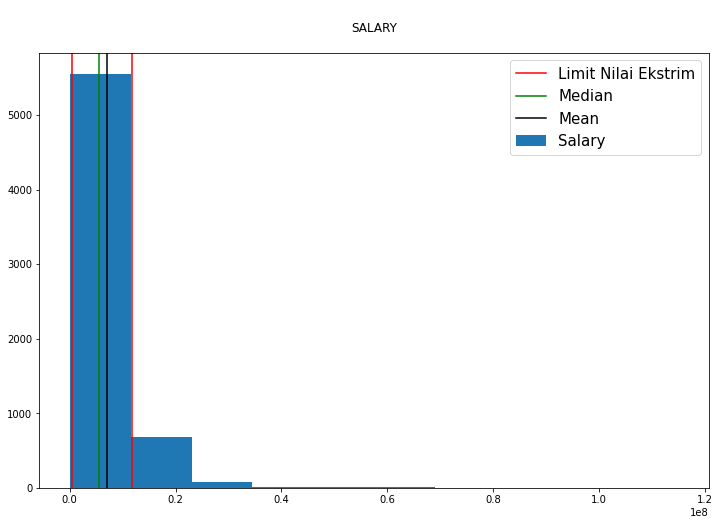

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(train_new['salary'], bins=10, label='Salary')

ax.axvline(limit_atas, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah, color='r')

ax.axvline(median_salary, color='g', label='Median')
ax.axvline(mean_salary, color='k', label='Mean')

plt.title("\nSALARY\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

In [ ]:
len(train_new[train_new['salary'] >= limit_atas])

786

In [ ]:
train_new[train_new['salary'] >= limit_atas].head(3)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled
26,27,marketing communication & channel manager,Jakarta Pusat,2,2.0,9,0,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29.0,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,0.052632
91,92,distribution center manager,Jawa Timur,2,3.0,6,0,"Pelayanan,Logistik/Rantai Pasokan","Asuransi kesehatan;Parkir;Waktu regular, Senin...",22.0,501 - 1000 pekerja,Makanan & Minuman/Katering/Restoran,Job Description :Responsible for the whole war...,22500000.0,0.105263
122,123,finance & accounting manager - port management...,Jawa Barat,2,3.0,3,0,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",NaN,19.0,1- 50 pekerja,Manajemen/Konsulting HR,About The Company:The working venue is in Suba...,16000000.0,0.105263


In [ ]:
# train_new.drop(train_new[train_new['salary'] >= limit_atas].index, axis=0, inplace = True)

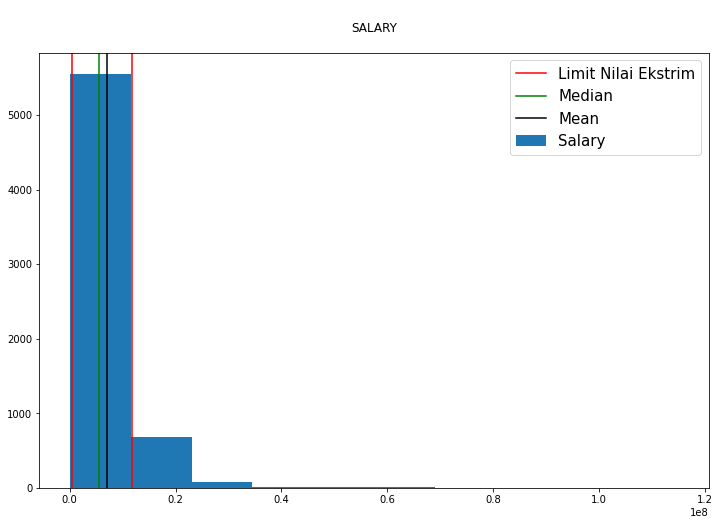

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(train_new['salary'], bins=10, label='Salary')

ax.axvline(limit_atas, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah, color='r')

ax.axvline(median_salary, color='g', label='Median')
ax.axvline(mean_salary, color='k', label='Mean')

plt.title("\nSALARY\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


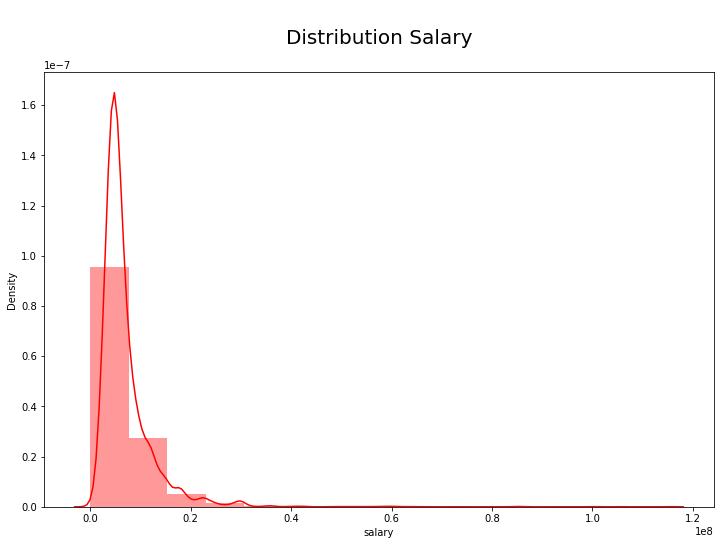

In [ ]:
plt.figure(figsize = (12,8))
plt.title('\nDistribution Salary\n', fontsize = 20)
sns.distplot(train_new['salary'], kde=True, bins=15, color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


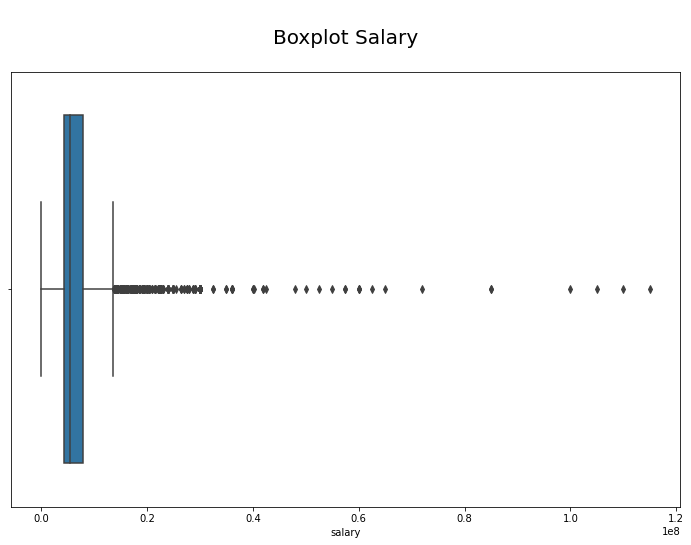

In [ ]:
plt.figure(figsize = (12,8))
plt.title('\nBoxplot Salary\n', fontsize = 20)
sns.boxplot(train_new['salary'])

In [ ]:
train_new.shape

(6342, 15)

In [ ]:
len(train_new['job_title'].unique())

3932

## location

In [ ]:
train_new['location'].unique()

array(['Balikpapan', 'Banten', 'Jakarta Pusat', 'Surabaya', 'Papua',
       'Tangerang', 'Jakarta Timur', 'Jakarta Barat', 'Maluku Utara',
       'Jakarta Raya', 'Sidoarjo', 'Jakarta Utara', 'Bali', 'Batam',
       'Jawa Barat', 'Jawa Timur', 'Aceh', 'Jakarta Selatan', 'Cilegon',
       'Sumatera Utara', 'Semarang', 'Jambi', 'Cikarang', 'Palembang',
       'Riau', 'Pasuruan', 'Bekasi', 'Sulawesi Tengah', 'Makassar',
       'Bandung', 'Padang', 'Sumatera Selatan', 'Rangkasbitung', 'Serang',
       'Kapuas', 'Yogyakarta', 'Cianjur', 'Badung', 'Banjarmasin',
       'Kediri', 'Tanah Bumbu', 'Samarinda', 'Bengkulu', 'Banjarnegara',
       'Cirebon', 'Pekanbaru', 'Bandar Lampung', 'Bogor',
       'Kalimantan Barat', 'Maros', 'Sleman', 'Gresik', 'Nunukan',
       'Depok', 'Medan', 'Seminyak', 'Karawang', 'Purwokerto',
       'Jawa Tengah', 'Sukabumi', 'Mojokerto', 'Sumatera Barat',
       'Lhokseumawe', 'Denpasar', 'Klungkung', 'Tegal',
       'Kalimantan Timur', 'Lampung', 'Surakarta', 'Purw

In [ ]:
# harusnya ada 32 unique provinsi
def loc(tempat):
  aceh = ['aceh', 'lhokseumawe', 'kota banda aceh']
  sumatera_utara = ['pematangsiantar', 'sibolga', 'sumatera utara', 'medan', 'binjai', 'tanjung balai']
  sumatera_barat = ['padang', 'sumatera barat', 'bukittinggi']
  riau = ['riau', 'pekanbaru', 'dumai']
  jambi =['jambi']
  kepulauan_riau = ['kepulauan riau', 'batam', 'tanjung pinang','bintan']
  bengkulu = ['bengkulu']
  sumatera_selatan = ['palembang', 'sumatera selatan', 'muara enim', 'prabumulih']
  kepulauan_bangka_belitung = ['bangka', 'belitung', 'bangka belitung', 'pangkal pinang']
  lampung = ['bandar lampung', 'lampung', 'metro']
  banten = ['banten','tangerang', 'cilegon', 'rangkasbitung', 'serang', 'cikupa', 'pandeglang']
  jakarta = ['kepulauan seribu', 'jakarta pusat', 'jakarta timur', 'jakarta barat', 'jakarta raya', 'jakarta utara', 'jakarta selatan']
  jawa_barat = ['cileungsi', 'tasikmalaya', 'citeureup', 'cimahi', 'cibinong', 'jawa barat', 'cikarang', 'bekasi', 'bandung', 'cianjur', 'cirebon', 'bogor', 'depok', 'karawang', 'sukabumi', 'purwakarta']
  jawa_tengah = ['purbalingga', 'wonogiri ', 'ungaran', 'salatiga', 'kudus', 'purworejo', 'demak', 'brebes', 'klaten', 'pemalang', 'cilacap', 'pekalongan', 'jawa tengah', 'semarang', 'banjarnegara', 'purwokerto', 'tegal', 'surakarta', 'magelang', 'jepara']
  yogyakarta = ['yogyakarta', 'sleman', 'bantul', 'kulon progo']
  jawa_timur = ['batu', 'ponorogo', 'blitar', 'probolinggo', 'tuban', 'madura', 'banyuwangi', 'jember', 'madiun', 'surabaya','sidoarjo', 'jawa timur', 'pasuruan', 'kediri', 'gresik', 'mojokerto', 'malang']
  bali = ['ubud', 'bali', 'seminyak', 'denpasar', 'klungkung', 'badung', 'kuta', 'gianyar']
  nusa_tenggara_barat = ['bima', 'nusa tenggara barat', 'mataram', 'lombok']
  nusa_tenggara_timur = ['nusa tenggara timur', 'kupang']
  kalimantan_barat = ['singkawang' ,'ketapang' ,'kalimantan barat', 'pontianak']
  kalimantan_tengah = ['kotawaringin barat', 'murung raya', 'palangkaraya', 'kapuas', 'kalimantan tengah', 'kotawaringin timur']
  kalimantan_selatan = ['hulu sungai tengah', 'kotabaru', 'banjarbaru', 'banjarmasin', 'tanah bumbu', 'banjar', 'kalimantan selatan']
  kalimantan_timur = ['kutai barat', 'bontang', 'kutai kartanegara', 'kutai timur', 'tarakan', 'balikpapan', 'samarinda', 'nunukan', 'kalimantan timur', 'penajam paser utara']
  kalimantan_utara = ['kalimantan utara']
  sulawesi_barat = ['sulawesi barat', 'mamuju']
  sulawesi_selatan = ['pare-pare', 'makassar', 'maros', 'palopo', 'sulawesi selatan', 'gowa']
  sulawesi_tenggara = ['sulawesi tenggara', 'kendari']
  sulawesi_tengah = ['sulawesi tengah', 'palu', 'poso']
  gorontalo = ['gorontalo']
  sulawesi_utara = ['bitung', 'sulawesi utara', 'manado', 'minahasa']
  maluku_utara = ['maluku utara', 'ternate', 'halmahera']
  maluku = ['ambon', 'maluku']
  papua_barat = ['manokwari', 'papua barat']
  papua = ['papua', 'jayapura', 'timika']
  locs = tempat.lower()
  if locs in aceh:
    return 0
  elif locs in sumatera_utara:
    return 1
  elif locs in sumatera_barat:
    return 2
  elif locs in riau:
    return 3
  elif locs in jambi:
    return 4
  elif locs in kepulauan_riau:
    return 5
  elif locs in bengkulu:
    return 6
  elif locs in sumatera_selatan:
    return 7
  elif locs in kepulauan_bangka_belitung:
    return 8
  elif locs in lampung:
    return 9
  elif locs in banten:
    return 10
  elif locs in jakarta:
    return 11
  elif locs in jawa_barat:
    return 12
  elif locs in jawa_tengah:
    return 13
  elif locs in yogyakarta:
    return 14
  elif locs in jawa_timur:
    return 15
  elif locs in bali:
    return 16
  elif locs in nusa_tenggara_barat:
    return 17
  elif locs in nusa_tenggara_timur:
    return 18
  elif locs in kalimantan_barat:
    return 19
  elif locs in kalimantan_tengah:
    return 20
  elif locs in kalimantan_selatan:
    return 21
  elif locs in kalimantan_timur:
    return 22
  elif locs in kalimantan_utara:
    return 23
  elif locs in sulawesi_barat:
    return 24
  elif locs in sulawesi_selatan:
    return 25
  elif locs in sulawesi_tenggara:
    return 26
  elif locs in sulawesi_tengah:
    return 27
  elif locs in gorontalo:
    return 28
  elif locs in sulawesi_utara:
    return 29
  elif locs in maluku:
    return 30
  elif locs in maluku_utara:
    return 31
  elif locs in papua:
    return 32
  elif locs in papua_barat:
    return 33
  else:
    return locs

In [ ]:
# def loc(tempat):
#   aceh = ['aceh', 'lhokseumawe', 'kota banda aceh']
#   banten = ['banten','tangerang', 'cilegon', 'rangkasbitung', 'serang', 'cikupa', 'pandeglang']
#   sumatera_utara = ['pematangsiantar', 'sibolga', 'sumatera utara', 'medan', 'binjai', 'tanjung balai']
#   sumatera_barat = ['padang', 'sumatera barat', 'bukittinggi']
#   riau = ['riau', 'pekanbaru', 'dumai']
#   jambi =['jambi']
#   kepulauan_riau = ['kepulauan riau', 'batam', 'tanjung pinang','bintan']
#   bengkulu = ['bengkulu']
#   sumatera_selatan = ['palembang', 'sumatera selatan', 'muara enim', 'prabumulih']
#   kepulauan_bangka_belitung = ['bangka', 'belitung', 'bangka belitung', 'pangkal pinang']
#   lampung = ['bandar lampung', 'lampung', 'metro']
#   jakarta = ['kepulauan seribu', 'jakarta pusat', 'jakarta timur', 'jakarta barat', 'jakarta raya', 'jakarta utara', 'jakarta selatan']
#   jawa_barat = ['cileungsi', 'tasikmalaya', 'citeureup', 'cimahi', 'cibinong', 'jawa barat', 'cikarang', 'bekasi', 'bandung', 'cianjur', 'cirebon', 'bogor', 'depok', 'karawang', 'sukabumi', 'purwakarta']
#   jawa_tengah = ['purbalingga', 'wonogiri ', 'ungaran', 'salatiga', 'kudus', 'purworejo', 'demak', 'brebes', 'klaten', 'pemalang', 'cilacap', 'pekalongan', 'jawa tengah', 'semarang', 'banjarnegara', 'purwokerto', 'tegal', 'surakarta', 'magelang', 'jepara']
#   yogyakarta = ['yogyakarta', 'sleman', 'bantul', 'kulon progo']
#   jawa_timur = ['batu', 'ponorogo', 'blitar', 'probolinggo', 'tuban', 'madura', 'banyuwangi', 'jember', 'madiun', 'surabaya','sidoarjo', 'jawa timur', 'pasuruan', 'kediri', 'gresik', 'mojokerto', 'malang']
#   bali = ['ubud', 'bali', 'seminyak', 'denpasar', 'klungkung', 'badung', 'kuta', 'gianyar']
#   nusa_tenggara_barat = ['bima', 'nusa tenggara barat', 'mataram', 'lombok']
#   nusa_tenggara_timur = ['nusa tenggara timur', 'kupang']
#   kalimantan_barat = ['singkawang' ,'ketapang' ,'kalimantan barat', 'pontianak']
#   kalimantan_tengah = ['kotawaringin barat', 'murung raya', 'palangkaraya', 'kapuas', 'kalimantan tengah', 'kotawaringin timur']
#   kalimantan_selatan = ['hulu sungai tengah', 'kotabaru', 'banjarbaru', 'banjarmasin', 'tanah bumbu', 'banjar', 'kalimantan selatan']
#   kalimantan_timur = ['kutai barat', 'bontang', 'kutai kartanegara', 'kutai timur', 'tarakan', 'balikpapan', 'samarinda', 'nunukan', 'kalimantan timur', 'penajam paser utara']
#   kalimantan_utara = ['kalimantan utara']
#   sulawesi_barat = ['sulawesi barat', 'mamuju']
#   sulawesi_selatan = ['pare-pare', 'makassar', 'maros', 'palopo', 'sulawesi selatan', 'gowa']
#   sulawesi_tenggara = ['sulawesi tenggara', 'kendari']
#   sulawesi_tengah = ['sulawesi tengah', 'palu', 'poso']
#   gorontalo = ['gorontalo']
#   sulawesi_utara = ['bitung', 'sulawesi utara', 'manado', 'minahasa']
#   maluku_utara = ['maluku utara', 'ternate', 'halmahera']
#   maluku = ['ambon', 'maluku']
#   papua_barat = ['manokwari', 'papua barat']
#   papua = ['papua', 'jayapura', 'timika']
#   locs = tempat.lower()
#   if locs in aceh:
#     return 'aceh'
#   elif locs in sumatera_utara:
#     return 'sumatera_utara'
#   elif locs in sumatera_barat:
#     return 'sumatera_barat'
#   elif locs in riau:
#     return 'riau'
#   elif locs in jambi:
#     return 'jambi'
#   elif locs in kepulauan_riau:
#     return 'kepulauan_riau'
#   elif locs in bengkulu:
#     return 'bengkulu'
#   elif locs in sumatera_selatan:
#     return 'sumatera_selatan'
#   elif locs in kepulauan_bangka_belitung:
#     return 'kepulauan_bangka_belitung'
#   elif locs in lampung:
#     return 'lampung'
#   elif locs in banten:
#     return 'banten'
#   elif locs in jakarta:
#     return 'jakarta'
#   elif locs in jawa_barat:
#     return 'jawa_barat'
#   elif locs in jawa_tengah:
#     return 'jawa_tengah'
#   elif locs in yogyakarta:
#     return 'yogyakarta'
#   elif locs in jawa_timur:
#     return 'jawa_timur'
#   elif locs in bali:
#     return 'bali'
#   elif locs in nusa_tenggara_barat:
#     return 'nusa_tenggara_barat'
#   elif locs in nusa_tenggara_timur:
#     return 'nusa_tenggara_timur'
#   elif locs in kalimantan_barat:
#     return 'kalimantan_barat'
#   elif locs in kalimantan_tengah:
#     return 'kalimantan_tengah'
#   elif locs in kalimantan_selatan:
#     return 'kalimantan_selatan'
#   elif locs in kalimantan_timur:
#     return 'kalimantan_timur'
#   elif locs in kalimantan_utara:
#     return 'kalimantan_utara'
#   elif locs in sulawesi_barat:
#     return 'sulawesi_barat'
#   elif locs in sulawesi_selatan:
#     return 'sulawesi_selatan'
#   elif locs in sulawesi_tenggara:
#     return 'sulawesi_tenggara'
#   elif locs in sulawesi_tengah:
#     return 'sulawesi_tengah'
#   elif locs in gorontalo:
#     return 'gorontalo'
#   elif locs in sulawesi_utara:
#     return 'sulawesi_utara'
#   elif locs in maluku:
#     return 'maluku'
#   elif locs in maluku_utara:
#     return 'maluku_utara'
#   elif locs in papua:
#     return 'papua'
#   elif locs in papua_barat:
#     return 'papua_barat'

In [ ]:
train_new['location'] = train_new['location'].apply(loc)

In [ ]:
train_new['location'].unique()

array([22, 10, 11, 15, 32, 31, 16,  5, 12,  0,  1, 13,  4,  7,  3, 27, 25,
        2, 20, 14, 21,  6,  9, 19, 18, 29, 24, 23, 17, 26, 30,  8, 28])

In [ ]:
train_new.describe()

,id,location,career_level,experience_level,education_level,employment_type,company_process_time,salary,experience_level_scaled
count,6342.000000,6342.000000,6342.000000,6342.000000,6342.000000,6342.000000,6342.000000,6.342000e+03,6342.000000
mean,15879.998896,11.773258,1.158467,2.379814,6.161779,0.170293,21.052980,7.112403e+06,0.072622
std,9191.057248,4.470371,0.846129,1.670301,1.704934,0.466524,6.883836,5.936426e+06,0.087911
min,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.300000e+03,0.000000
25%,7954.250000,11.000000,1.000000,1.000000,5.000000,0.000000,21.000000,4.250000e+06,0.000000
50%,15972.000000,11.000000,1.000000,2.000000,6.000000,0.000000,21.000000,5.500000e+06,0.052632
75%,23851.500000,12.000000,1.000000,3.000000,7.000000,0.000000,27.000000,8.000000e+06,0.105263
max,31745.000000,32.000000,4.000000,20.000000,9.000000,4.000000,30.000000,1.150000e+08,1.000000


## job_title_label

In [ ]:
len(train_new['job_title'].unique())

3932

In [ ]:
def hapus_min(data):
  split_string = data.split("-", 1)
  substring = split_string[0]
  return substring.rstrip()

In [ ]:
train_new['job_title'] = train_new['job_title'].apply(hapus_min)

In [ ]:
len(train_new['job_title'].unique())

3514

In [ ]:
train_new.head(10)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled
5,6,kepala pabrik,22,0,2.38,5,0,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18.0,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,0.072632
9,10,tax supervisor,10,0,3.00,5,0,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22.0,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,0.105263
18,19,accounting staff,11,1,1.00,5,0,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,21.0,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,0.000000
22,23,senior staff purchasing,15,1,2.00,5,0,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29.0,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,0.052632
26,27,marketing communication & channel manager,11,2,2.00,9,0,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29.0,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,0.052632
28,29,mechanic,32,1,1.00,9,0,"Teknik,Mekanikal","Asuransi kesehatan;Waktu regular, Senin - Juma...",21.0,51 - 200 pekerja,Automobil/Mesin Tambahan Automotif/Kendaraan,Kualifikasinya :Pendidikan Minimal SMK Jurusan...,5040000.0,0.000000
31,32,ppic,10,2,5.00,6,0,"Manufaktur,Manufaktur","Asuransi kesehatan;Waktu regular, Senin - Juma...",21.0,201 - 500 pekerja,Manufaktur/Produksi,Tanggung Jawab:Membuat perencanaan produksi be...,6600000.0,0.210526
34,35,c# advanced/senior developer,11,0,2.00,5,0,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",5.0,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),Kualifikasi:Kandidat harus memiliki setidaknya...,9500000.0,0.052632
35,36,manager tiktok shop and tiktok live,10,2,1.00,5,0,"Penjualan / Pemasaran,E-commerce",Kasual (contoh: Kaos);Potensi Perkembangan Kar...,21.0,1- 50 pekerja,Umum & Grosir,Perusahaan yang bergerak di bidang online shop...,6500000.0,0.000000
37,38,it software developer staff,11,1,1.00,4,0,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Kasual (contoh: Kaos);Senin - Jum'at (HO) Seni...,21.0,501 - 1000 pekerja,Industri Berat/Mesin/Peralatan,Bachelor’s degree of Information Technology or...,6800000.0,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

model_label_job_title = le.fit(train_new['job_title'])

In [ ]:
model_label_job_title.classes_

array([' graphic designer', ' marcomm staff', '.net core web developer',
       ..., '融资经理', '销售总经理助理 （中文和英文强 ）',
       '项目翻译管理员 （ site mandarin translator )'], dtype=object)

In [ ]:
train_new['job_title'].unique()

array(['kepala pabrik', 'tax supervisor', 'accounting staff', ...,
       'commis pastry / baker', 'personal  assistant to owner',
       'temporary media design officer'], dtype=object)

In [ ]:
train_new['job_title_label'] = model_label_job_title.transform(train_new['job_title'])

In [ ]:
train_new['job_title_label'].unique()

array([1600, 3273,   79, ...,  572, 2133, 3365])

# TRAIN MODEL

## Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = train_new[[
              #  'job_title_label',
               'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]]

y = train_new[['salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(train_new[[
                #  'job_title_label',
                'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]])

In [ ]:
from sklearn.metrics import r2_score

print(round(r2_score(train_new['salary'], y_pred_lr), 4))

0.3492


In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE\t\t: ", np.sqrt(mean_squared_error(train_new['salary'], y_pred_lr)))

RMSE		:  4788647.215243954


RMSE		:  2154379.2746065683

## Deciosion Tree Regressor

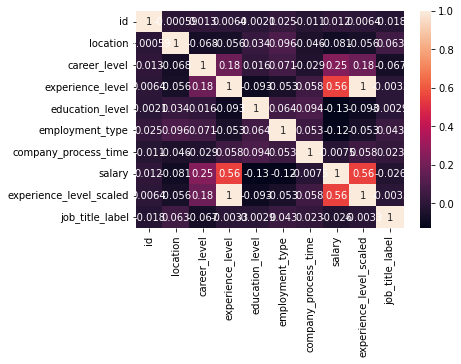

In [ ]:
import seaborn as sns

sns.heatmap(
    train_new.corr(),
    annot=True
)

In [ ]:
from sklearn.model_selection import train_test_split

X = train_new[[
              #  'job_title_label',
               'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]]

y = train_new[['salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()

DT_model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [ ]:
y_pred_DT = DT_model.predict(train_new[[
                #  'job_title_label',
                'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]])

In [ ]:
from sklearn.metrics import r2_score

print(round(r2_score(train_new['salary'], y_pred_DT), 4))

0.771


In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE\t\t: ", np.sqrt(mean_squared_error(train_new['salary'], y_pred_DT)))

RMSE		:  2840875.7531684483


RMSE		:  3326318.9945145836

In [ ]:
train_new.head(3)

,id,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,experience_level_scaled,job_title_label
5,6,kepala pabrik,22,0,2.38,5,0,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18.0,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,0.072632,1600
9,10,tax supervisor,10,0,3.00,5,0,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22.0,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,0.105263,3273
18,19,accounting staff,11,1,1.00,5,0,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,21.0,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,0.000000,79


In [ ]:
print(DT_model.predict([[1600, 0, 2.38, 22, 5, 0]]))
print(DT_model.predict([[3273, 0, 3.00, 10, 5, 0]]))
print(DT_model.predict([[79, 1, 1.00, 11, 5, 0]]))

[29000000.]
[29000000.]
[29000000.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


## Random Forest Reggresor

In [ ]:
from sklearn.model_selection import train_test_split

X = train_new[[
              #  'job_title_label',
               'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]]

y = train_new[['salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
len(X_train)

5073

In [ ]:
len(y_train)

5073

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
RF_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
RF_model.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(random_state=0)

In [ ]:
y_pred_RF = RF_model.predict(train_new[[
                #  'job_title_label',
                'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'
               ]])

In [ ]:
from sklearn.metrics import r2_score

print(round(r2_score(train_new['salary'], y_pred_RF), 4))

0.8009


In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE\t\t: ", np.sqrt(mean_squared_error(train_new['salary'], y_pred_RF)))

RMSE		:  2648610.1303443406


DT RMSE : 2154379.2746065683

## RMSE

In [ ]:
np.sqrt(mean_squared_error(train_new['salary'], y_pred_DT)) - np.sqrt(mean_squared_error(train_new['salary'], y_pred_RF))

192265.62282410776

# PREDICT

In [ ]:
predict_case = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/predict-case.csv', sep="|")

In [ ]:
predict_case.head(1)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
0,31747,Sous Chef,Lombok,IDR,Pegawai (non-manajemen & non-supervisor),8 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",NaN,NaN,NaN,Makanan & Minuman/Katering/Restoran,Candidate must posses at least bachelor degree...


In [ ]:
predict_case.isna().sum()

id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
experience_level         249
education_level            0
employment_type            0
job_function               0
job_benefits             749
company_process_time    1047
company_size             480
company_industry         100
job_description            0
dtype: int64

## job_title

In [ ]:
# predict_case["job_title"] = predict_case["job_title"].apply(lambda item: np.NaN if item is np.NaN else str(item).lower())

In [ ]:
# def removeTextInsideBrackets(data):
#   data = re.sub("\(.*?\)", "", data)
#   return data

In [ ]:
# predict_case["job_title"] = predict_case["job_title"].apply(removeTextInsideBrackets)

In [ ]:
# def hapus_min(data):
#   split_string = data.split("-", 1)
#   substring = split_string[0]
#   return substring.rstrip()

In [ ]:
# predict_case['job_title'] = predict_case['job_title'].apply(hapus_min)

In [ ]:
# len(predict_case['job_title'].unique())

In [ ]:
# predict_case['job_title_label'] = model_label_job_title.transform(predict_case['job_title'])

In [ ]:
# predict_case['job_title_label'].unique()

## location

In [ ]:
predict_case['location'] = predict_case['location'].apply(loc)

In [ ]:
predict_case['location'].unique()

array([17, 27, 11,  0, 15, 16, 12, 14, 10, 19,  1,  6,  4, 21,  5, 13,  3,
        8, 22, 25, 18,  7, 32, 29, 20, 24,  9, 31,  2, 30, 26, 33, 28, 23])

## career_level

* 'Supervisor/Koordinator',
*       'Pegawai (non-manajemen & non-supervisor)',
*      'Manajer/Asisten Manajer',
*     'Lulusan baru/Pengalaman kerja kurang dari 1 tahun',
*    'CEO/GM/Direktur/Manajer Senior']

In [ ]:
for i in predict_case['career_level'].unique():
  print(i)

Pegawai (non-manajemen & non-supervisor)
Manajer/Asisten Manajer
Supervisor/Koordinator
Lulusan baru/Pengalaman kerja kurang dari 1 tahun
CEO/GM/Direktur/Manajer Senior


In [ ]:
def career_level_label(cl):
    if cl == career_level[2]:
        return 0
    elif cl == career_level[0]:
        return 1
    elif cl == career_level[1]:
        return 2
    elif cl == career_level[3]:
        return 3
    elif cl == career_level[4]:
        return 4

In [ ]:
predict_case['career_level'] = predict_case['career_level'].apply(career_level_label)

In [ ]:
predict_case['career_level'].unique() 

array([2, 0, 1, 3, 4])

## experience_level

In [ ]:
predict_case[predict_case['experience_level'] == 'Lebih dari 20 Tahun']

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
46,31793,Process Engineer,4,IDR,1,Lebih dari 20 Tahun,Sarjana (S1),Penuh Waktu,"Teknik,Mekanikal",Asuransi kesehatan;Pinjaman;Company Uniform (T...,30 days,1001 - 2000 pekerja,Manufaktur/Produksi,1. Monitoring production capacity which follow...


In [ ]:
def experience_level(el):
    if el is not np.NaN:
      if el == 'Lebih dari 20 Tahun':
        return 20
      variabel_baru = el.replace(" tahun", "")  
      return int(variabel_baru)
    

In [ ]:
predict_case['experience_level'] = predict_case['experience_level'].apply(experience_level)

In [ ]:
predict_case['experience_level'].unique()

array([ 8.,  1.,  3.,  5.,  2., nan, 20.,  4.,  7., 10.,  6., 15., 12.])

In [ ]:
round(predict_case['experience_level'].mean(), 2)

2.39

In [ ]:
predict_case['experience_level'].fillna(round(predict_case['experience_level'].mean(), 2), inplace=True)

In [ ]:
predict_case['experience_level'].unique()

array([ 8.  ,  1.  ,  3.  ,  5.  ,  2.  ,  2.39, 20.  ,  4.  ,  7.  ,
       10.  ,  6.  , 15.  , 12.  ])

## education_level 

In [ ]:
def education_level_label(el):
    if "Doktor (S3)" in el and "Sertifikat Professional" in el:
        return 0
    elif "Doktor (S3)" in el and "Gelar Professional" in el:
        return 1
    elif "Doktor (S3)" in el:
        return 2
    elif "Magister (S2)" in el and "Sertifikat Professional" in el:
        return 3
    elif "Magister (S2)" in el and "Gelar Professional" in el:
        return 4
    # elif "Magister (S2)" in el:
    #     return 5
    elif "Sarjana (S1)" in el and "Sertifikat Professional" in el:
        return 5
    # elif "Sarjana (S1)" in el and "Gelar Professional" in el:
    #     return 7
    elif "Sarjana (S1)" in el:
        return 6
    elif "D4 (Diploma)" in el and "Sertifikat Professional" in el:
        return 7
    # elif "D4 (Diploma)" in el and "Gelar Professional" in el:
    #     return 10
    # elif "D4 (Diploma)" in el:
    #     return 11
    elif "SMU/SMK/STM" in el:
        return 8
    elif "Tidak terspesifikasi" in el:
        return 9
    else:
        return el

In [ ]:
predict_case['education_level'] = predict_case['education_level'].apply(education_level_label)

In [ ]:
predict_case['education_level'].unique()

array([3, 5, 4, 9, 8, 6, 7, 1])

## employment_type  

* 'Penuh Waktu', 
* 'Kontrak', 
* 'Paruh Waktu', 
* 'Magang',
* 'Temporer'

In [ ]:
et_label = predict_case['employment_type'].unique()
et_label

array(['Penuh Waktu', 'Kontrak', 'Paruh Waktu', 'Magang', 'Temporer',
       'Penuh Waktu, Kontrak', 'Penuh Waktu, Paruh Waktu',
       'Kontrak, Temporer'], dtype=object)

In [ ]:
def employment_type_label(et):
    if et == et_label[0] or et == 'Penuh Waktu, Kontrak' or et == 'Penuh Waktu, Paruh Waktu':
        return 0
    elif et == et_label[1] or et == 'Kontrak, Temporer':
        return 1
    elif et == et_label[2]:
        return 2
    elif et == et_label[3]:
        return 3
    elif et == et_label[4]:
        return 4

In [ ]:
predict_case['employment_type'] = predict_case['employment_type'].apply(employment_type_label)

In [ ]:
predict_case['employment_type'].unique()

array([0, 1, 2, 3, 4])

## compnay_process_time

In [ ]:
def company_process_time(cpt):
    if cpt is not np.NaN and cpt == '1 day':
        variabel_baru = cpt.replace(" day", "")  
        return int(variabel_baru)
    elif cpt is not np.NaN:
        variabel_baru = cpt.replace(" days", "")
        return int(variabel_baru)  

In [ ]:
predict_case['company_process_time'] = predict_case['company_process_time'].apply(company_process_time)

In [ ]:
predict_case['company_process_time'].mean()

21.107526881720432

In [ ]:
predict_case['company_process_time'].fillna(round(predict_case['company_process_time'].mean(), 0), inplace=True)

## Predict Dataset

In [ ]:
predict_case.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
0,31747,Sous Chef,17,IDR,2,8.0,3,0,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",NaN,NaN,NaN,Makanan & Minuman/Katering/Restoran,Candidate must posses at least bachelor degree...
1,31748,"Bancassurance Officer (Area: Bali, Sulawesi Ut...",27,IDR,2,1.0,5,0,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan","Asuransi kesehatan;Waktu regular, Senin - Juma...",14.0,201 - 500 pekerja,Asuransi,Bancassurance Officer adalah Representative da...
2,31749,Marketing Staff,11,IDR,2,1.0,5,0,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",NaN,NaN,NaN,Manufaktur/Produksi,Bertanggung jawab atas penjualan sesuai dengan...
3,31750,Section Head Commercials,11,IDR,0,3.0,5,0,"Penjualan / Pemasaran,Penjualan Ritel",Uniform,NaN,501 - 1000 pekerja,Retail/Merchandise,Tanggung Jawab :Bertanggung jawab atas keselur...
4,31751,Social Media HEAD,0,IDR,1,3.0,5,0,"Penjualan / Pemasaran,Digital Marketing",NaN,NaN,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,# Memiliki pengalaman di atas# Harus memiliki ...


In [ ]:
predict_case.isna().sum()

id                         0
job_title                  0
location                   0
salary_currency            0
career_level               0
experience_level           0
education_level            0
employment_type            0
job_function               0
job_benefits             749
company_process_time    1047
company_size             480
company_industry         100
job_description            0
dtype: int64

'career_level', 
               'experience_level',
               'location', 
               'education_level', 
               'employment_type',
               'company_process_time'

In [ ]:
X_predict_case = predict_case[[
                               'career_level',
                               'experience_level',
                               'location',
                               'education_level',
                               'employment_type',
                               'company_process_time'
                               ]]

y_predict_case = RF_model.predict(X_predict_case)

In [ ]:
y_predict_case

array([16375500.        ,  8560016.66666667,  5816318.3283397 , ...,
        8875950.        ,  3406625.        ,  7347094.21340489])

In [ ]:
data_predict_final = pd.DataFrame(predict_case['id'], columns=['id'])

In [ ]:
data_predict_final['salary'] = y_predict_case

In [ ]:
data_predict_final.head(10)

,id,salary
0,31747,1.637550e+07
1,31748,8.560017e+06
2,31749,5.816318e+06
3,31750,9.003500e+06
4,31751,6.260000e+06
5,31752,1.019853e+07
6,31753,9.367917e+06
7,31754,2.228000e+07
8,31755,4.101205e+06
9,31756,8.214500e+06


In [ ]:
data_predict_final.salary.unique()

array([16375500.        ,  8560016.66666667,  5816318.3283397 , ...,
        6659943.3551824 ,  7184229.16666667,  7347094.21340489])

In [ ]:
data_predict_final['salary'] = data_predict_final['salary'].apply(lambda data: round(data))

In [ ]:
data_predict_final.head(3)

,id,salary
0,31747,16375500
1,31748,8560017
2,31749,5816318


In [ ]:
data_predict_final.shape

(3000, 2)

In [ ]:
data_predict_final.to_csv('submission.csv', index=False)

# coba_coba

X_predict_case = predict_case[[
                               'career_level',
                               'experience_level',
                               'location',
                               'education_level',
                               'employment_type',
                               'company_process_time'
                               ]]

In [ ]:
RF_model.predict([[2, 1.0, 27, 5, 0, 14.0]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


8560016.666666666

In [ ]:
predict_case.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
0,31747,Sous Chef,17,IDR,2,8.0,3,0,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",NaN,21.0,NaN,Makanan & Minuman/Katering/Restoran,Candidate must posses at least bachelor degree...
1,31748,"Bancassurance Officer (Area: Bali, Sulawesi Ut...",27,IDR,2,1.0,5,0,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan","Asuransi kesehatan;Waktu regular, Senin - Juma...",14.0,201 - 500 pekerja,Asuransi,Bancassurance Officer adalah Representative da...
2,31749,Marketing Staff,11,IDR,2,1.0,5,0,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",NaN,21.0,NaN,Manufaktur/Produksi,Bertanggung jawab atas penjualan sesuai dengan...
3,31750,Section Head Commercials,11,IDR,0,3.0,5,0,"Penjualan / Pemasaran,Penjualan Ritel",Uniform,21.0,501 - 1000 pekerja,Retail/Merchandise,Tanggung Jawab :Bertanggung jawab atas keselur...
4,31751,Social Media HEAD,0,IDR,1,3.0,5,0,"Penjualan / Pemasaran,Digital Marketing",NaN,21.0,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,# Memiliki pengalaman di atas# Harus memiliki ...


In [ ]:
train_new.head()

In [ ]:
train_new.isna().sum()

In [ ]:
train_new.job_benefits.unique()

In [ ]:
print(train_new.job_benefits.unique()[0])
print(train_new.job_benefits.unique()[1])

In [ ]:
len(train_new.job_benefits.unique())

In [ ]:
# train_new['education_level']
len(coba_coba['education_level'].unique())
# for i in coba_coba['education_level'].unique():
    # print(i)

In [ ]:
for i in range(len(coba_coba['education_level'].unique())):
  print(coba_coba['education_level'].unique()[i],":", len(coba_coba['education_level'].unique()[i]))

In [ ]:
train_new.head()

In [ ]:
train_new.shape[0] / len(train_new['location'].unique())

In [ ]:
len(train_new[train_new['location'] == 'Balikpapan'])

In [ ]:
len(train_new[train_new['location'] == 'Jakarta Pusat'])

# JUST A JOKE

In [ ]:
train_new.isna().sum()

In [ ]:
sns.boxplot(train_new['salary'])

In [ ]:
import seaborn as sns

sns.heatmap(
    train_new.corr(),
    annot=True
)

In [ ]:
from sklearn.model_selection import train_test_split

X = train_new[[
               'career_level', 
               'experience_level',
              #  'location', 
              #  'education_level', 
              #  'employment_type'
               ]]

y = train_new[['salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

In [ ]:
train_new.head(1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print("R2 Score\t: ", round(r2_score(y_test, y_pred), 4))
print("RMSE\t\t: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print(round(r2_score(y_test, y_pred), 4))

In [ ]:
print("Estimasi Gaji Rp",round(model.predict([[22, 0, 5]])[0][0]))

## coba2 part 2

In [ ]:
# from sklearn.model_selection import train_test_split

# X = train_new[['career_level', 'experience_level']]
# y = train_new[['salary']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


In [ ]:
# X_train.size

In [ ]:
# X_test.size

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

# model.fit(X, y)

In [ ]:
# train_new.head(1)

In [ ]:
# from sklearn.metrics import r2_score

# y_pred = model.predict(X_test)
# r2_score(y_test, y_pred)

In [ ]:
# print("Estimasi Gaji Rp",round(model.predict([[0, 2]])[0][0]))

In [ ]:
# sns.regplot(train_new['career_level'], train_new['salary'])

In [ ]:
# sns.regplot(train_new['experience_level'], train_new['salary'])

In [ ]:
# sns.regplot(train_new['education_level'], train_new['salary'])

In [ ]:
# sns.boxplot(train_new['salary'])

In [ ]:
# sns.violinplot(train_new['salary'])